<h1 align='center' style='color:purple'> Speech Recognition 語音識別 - 課程 6-  Voice to text model 語音轉文字 模型 - Python Tutorial</h1>

<font color=red size=6 face=雅黑>上机练习：在本代码基础上，通过调整模型结构(修改层数或神经元个数等)或模型超参数（学习率等），提高模型收敛速度，并降低模型的loss

<img src="https://i1.wp.com/www.simplifiedpython.net/wp-content/uploads/2018/07/speech-recognition-python.png?w=556&ssl=1" width="50%"> 

<img src="https://cdn.ttgtmedia.com/rms/onlineImages/crm-voice_recognition_mobile.png" width="50%"> 

<img src="https://i1.wp.com/www.simplifiedpython.net/wp-content/uploads/2018/07/speech-recognition-python-1.png?w=682&ssl=1" width="50%"> 

<img src="https://i2.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/07/originofsound.gif?zoom=1.25&resize=591%2C213&ssl=1" width="100%"> 

<img src="https://raw.githubusercontent.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/master/images/joomla_speech_prosody.png" width="100%"> 

# 程式範例

In [2]:
import librosa
print(librosa.__version__)

0.10.0.post2


In [3]:
import scipy
print(scipy.__version__)

1.7.3


In [4]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings

warnings.filterwarnings("ignore")

In [5]:
!pip install pyunpack
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 5.2 MB/s eta 0:00:00


如下图所示，在add data搜索框输入：tensorflow-speech-recognition-challenge，读取数据集

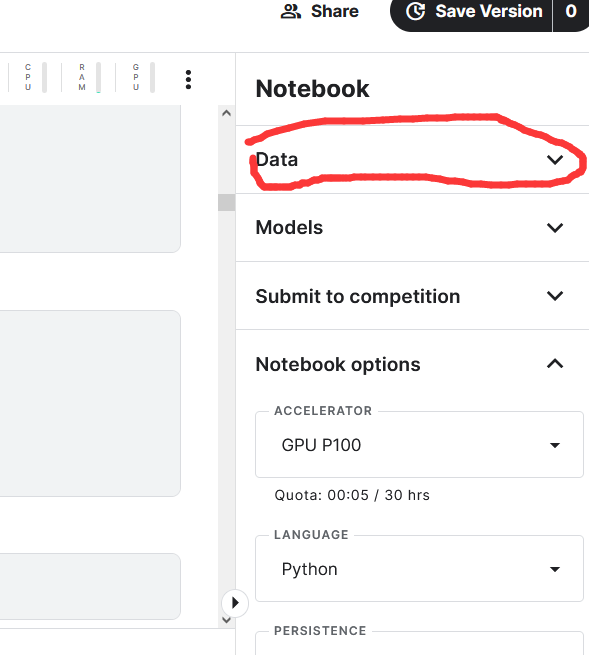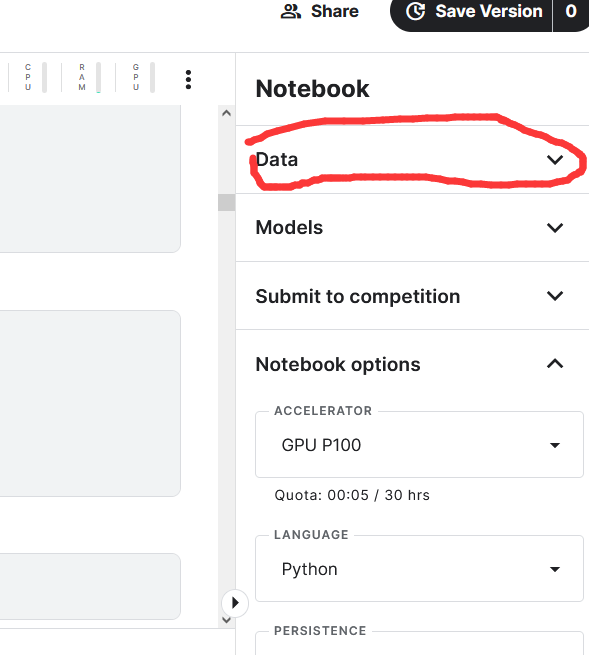

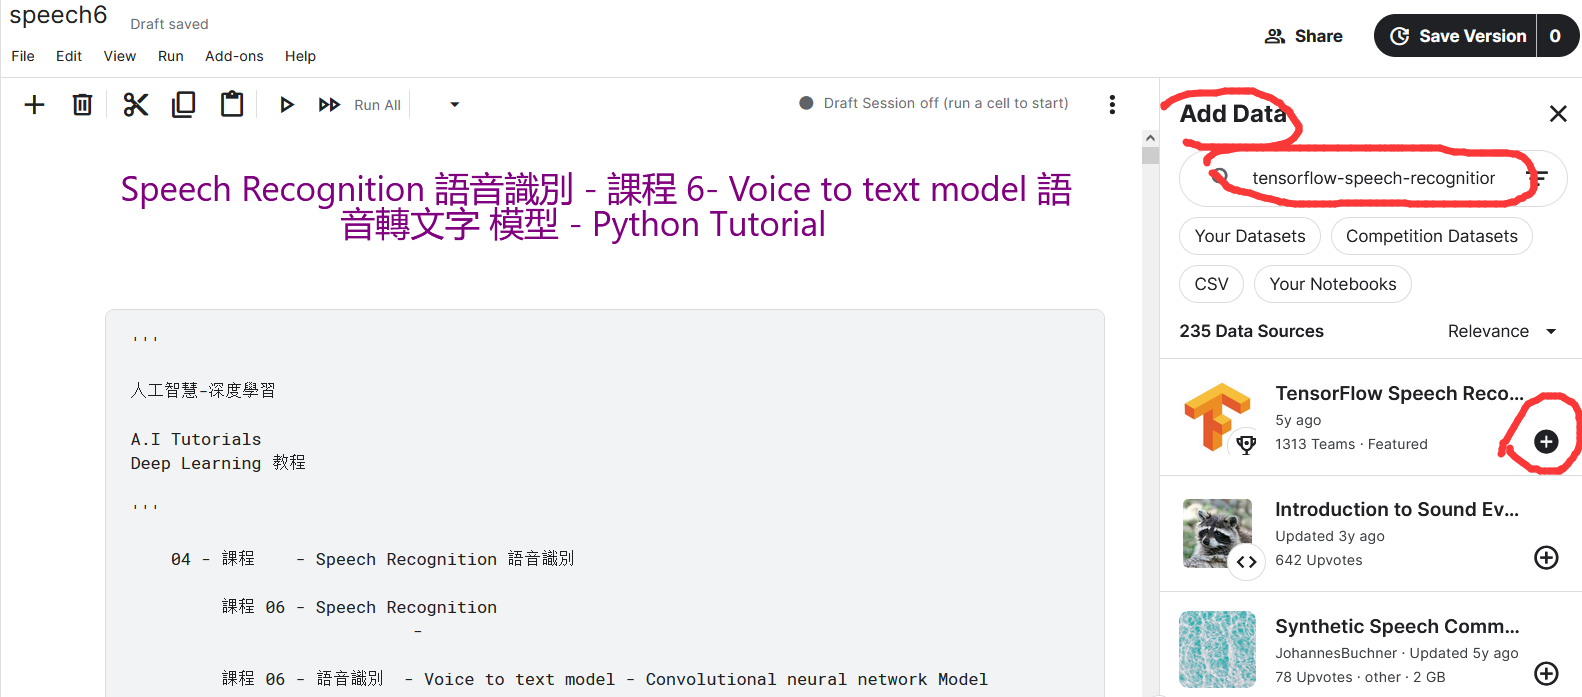

<font color=red size=6 face=雅黑>解压数据集到/kaggle/working/目录

In [6]:
from pyunpack import Archive
Archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z').extractall("/kaggle/working/")



In [7]:
train_audio_path = '/kaggle/working/train/audio/'
os.listdir(train_audio_path)

['three',
 'six',
 'sheila',
 'bed',
 'bird',
 'nine',
 'house',
 'marvin',
 'up',
 'yes',
 'zero',
 'happy',
 'stop',
 'tree',
 'right',
 'off',
 'wow',
 'down',
 'four',
 'two',
 'dog',
 'cat',
 'one',
 'eight',
 'five',
 'go',
 'seven',
 'left',
 'on',
 'no',
 '_background_noise_']

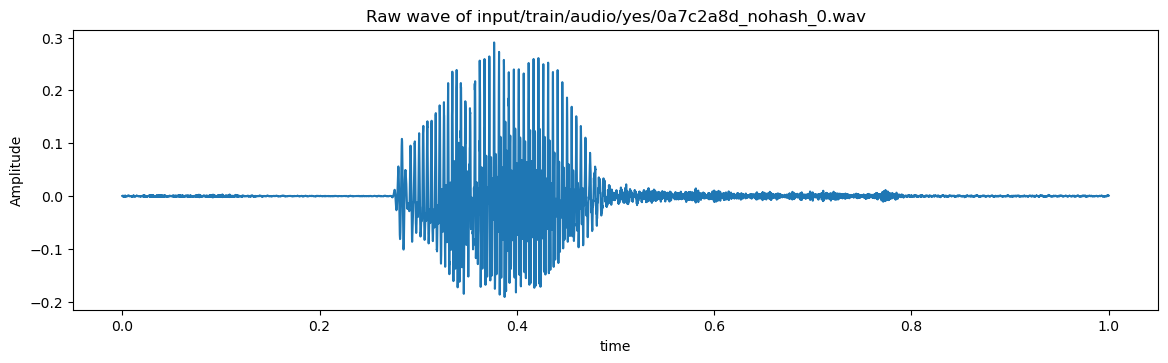

In [8]:
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 8000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [9]:
samples12, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 8000)

In [10]:
samples12

array([ 0.00012669, -0.00026598,  0.00023035, ...,  0.00020224,
        0.0001432 ,  0.00075079], dtype=float32)

In [11]:
len(samples12)

8000

In [12]:
ipd.Audio(samples12, rate=sample_rate)

In [15]:
print(sample_rate)

8000


In [17]:
labels=os.listdir(train_audio_path)

In [18]:
os.listdir(train_audio_path)

['three',
 'six',
 'sheila',
 'bed',
 'bird',
 'nine',
 'house',
 'marvin',
 'up',
 'yes',
 'zero',
 'happy',
 'stop',
 'tree',
 'right',
 'off',
 'wow',
 'down',
 'four',
 'two',
 'dog',
 'cat',
 'one',
 'eight',
 'five',
 'go',
 'seven',
 'left',
 'on',
 'no',
 '_background_noise_']

In [19]:
len(os.listdir(train_audio_path))

31

In [3]:
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

NameError: name 'os' is not defined

<font color=red size=6 face=雅黑>为了减少训练时间，将训练集改为下面10个单词

In [21]:
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

In [22]:
len(labels)

10

In [ ]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [23]:
%%time

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 8000)

        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go
CPU times: user 12.5 s, sys: 1.67 s, total: 14.2 s
Wall time: 14.3 s


In [24]:
all_label[0]

'yes'

In [ ]:
len(all_label)

In [ ]:
all_label[23]

In [25]:
%%time

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)
print(len(classes))

10
CPU times: user 26.4 ms, sys: 4.5 ms, total: 30.9 ms
Wall time: 48.9 ms


In [27]:
classes

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [28]:
y

array([9, 9, 9, ..., 1, 1, 1])

In [26]:
print(len(y))
y[3211:3221]

21312


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [29]:
import torch

<font color=red size=6 face=雅黑>将输入输出转为tensor

In [30]:
y_tensor=torch.from_numpy(y)

In [17]:
y_tensor

tensor([9, 9, 9,  ..., 1, 1, 1])

In [18]:
all_wave[0].shape

(8000,)

In [ ]:
len(all_wave)

In [21]:
all_wave_tensor = [torch.tensor(d) for d in all_wave]

In [22]:
len(all_wave_tensor[0])

8000

In [23]:
all_wave_tensor[0]

tensor([ 7.3001e-05,  1.9120e-04, -3.8695e-05,  ...,  1.4565e-04,
        -1.7770e-04, -3.6431e-04])

In [24]:
all_wave_tensor[0].size()

torch.Size([8000])

In [ ]:
aa=all_wave_tensor[0]
aa=torch.unsqueeze(aa,0)

In [25]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [26]:
class wave(Dataset):
    def __init__(self, x, label):
        self.x = x
        self.label = label
    
    def __len__(self):
        return len(self.label)
    
    def __getitem__(self, index):
        return self.x[index], self.label[index]

In [27]:
wavedataset=wave(all_wave_tensor,y_tensor)

In [28]:
wavedataset

In [29]:
train_loader = DataLoader(dataset=wavedataset, batch_size=32, shuffle=True, num_workers=0)

In [30]:
import torch.nn as nn


In [31]:

class Conv1DNet(nn.Module):
    def __init__(self):
        super(Conv1DNet, self).__init__()
        
        # First Conv1D layer
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=8, kernel_size=13, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=3)
        self.dropout1 = nn.Dropout(p=0.3)
        
        # Second Conv1D layer
        self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=11, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=3)
        self.dropout2 = nn.Dropout(p=0.3)
        
        # Third Conv1D layer
        self.conv3 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=9, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool1d(kernel_size=3)
        self.dropout3 = nn.Dropout(p=0.3)
        # forth Conv1D layer
        self.conv4 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=7, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool1d(kernel_size=3)
        self.dropout4 = nn.Dropout(p=0.3)
        
        
        # Fully connected layer
        self.fc1 = nn.Linear(in_features=6144, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

    def forward(self, x):
        # Pass the input through each layer
        batch_size=x.size(0)
        #print(x.size())
        #print(x)
        x = self.conv1(x)
        x = self.relu1(x)
        #print(x.size())
        x = self.pool1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.dropout2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = self.dropout3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool4(x)
        x = self.dropout4(x)
        #print(x.size(0))
        x = x.view(batch_size, -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x


In [32]:
model = Conv1DNet()

In [ ]:
aa=all_wave_tensor[0]
aa=torch.unsqueeze(aa,0)

In [ ]:
y_pred=model(aa)

In [ ]:
y_pred

In [ ]:
torch.argmax(y_pred)

In [ ]:
model.train()

In [ ]:
model.eval()

In [ ]:
aa.to(device)

In [34]:
model.train()
device = torch.device("cuda")
model.to(device)

Conv1DNet(
  (conv1): Conv1d(1, 8, kernel_size=(13,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (pool1): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.3, inplace=False)
  (conv2): Conv1d(8, 16, kernel_size=(11,), stride=(1,), padding=(1,))
  (relu2): ReLU()
  (pool2): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.3, inplace=False)
  (conv3): Conv1d(16, 32, kernel_size=(9,), stride=(1,), padding=(1,))
  (relu3): ReLU()
  (pool3): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (dropout3): Dropout(p=0.3, inplace=False)
  (conv4): Conv1d(32, 64, kernel_size=(7,), stride=(1,), padding=(1,))
  (relu4): ReLU()
  (pool4): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (dropout4): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=6144, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, b

In [36]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [37]:
if __name__ == '__main__':
    for epoch in range(40):
        for i,data in enumerate(train_loader,0): # train_loader 是先shuffle后mini_batch
            inputs, labels = data
            #print(inputs,len(labels))
            inputs=torch.unsqueeze(inputs,0)
            #print(inputs.size(),len(labels))
            inputs = inputs.permute(1, 0, 2)
            #print(inputs.size(),len(labels))
            inputs= inputs.to(device)
            #print(inputs.size())
            labels=labels.to(device)
            #print(labels.size())
            y_pred = model(inputs)
            loss = criterion(y_pred, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(epoch,  loss.item())
    
 
            


0 2.293853998184204
1 2.2954530715942383
2 2.30100154876709
3 2.303109645843506
4 2.298978805541992
5 2.3043878078460693
6 2.293081521987915
7 2.3008675575256348
8 2.2385339736938477
9 2.302377223968506
10 2.2653863430023193
11 2.2101104259490967
12 2.2747693061828613
13 2.2472589015960693
14 2.2303521633148193
15 2.1228771209716797
16 2.1772732734680176
17 2.04668927192688
18 2.1393258571624756
19 1.934191107749939
20 2.337857246398926
21 1.8485009670257568
22 2.0418152809143066
23 1.615830421447754
24 1.9086970090866089
25 1.8694515228271484
26 1.7796258926391602
27 1.2838776111602783
28 1.5650343894958496
29 1.4794809818267822
30 1.3987321853637695
31 1.691454291343689
32 1.8215596675872803
33 1.1109706163406372
34 0.9838857650756836
35 1.0080723762512207
36 1.953585147857666
37 1.143418312072754
38 1.4034956693649292
39 0.9043819308280945


In [ ]:
model.to("cpu")

<font color=red size=6 face=雅黑>查看模型在eval()和train()模式下输出的区别

In [ ]:
model.eval()

In [ ]:
aa=all_wave_tensor[0]
aa=torch.unsqueeze(aa,0)

In [ ]:
y_pred1=model(aa)

In [ ]:
torch.argmax(y_pred1)

In [ ]:
y[0]

<font color=red size=6 face=雅黑>TENSORFLOW版本：

In [ ]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [ ]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [ ]:
print(all_wave[0])
print(all_wave[0].shape)
len(all_wave)

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [ ]:
print(len(x_tr))
print(len(x_val))
print(len(y_tr))
print(len(y_val))

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
%%time

history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from keras.models import load_model
model=load_model('best_model.hdf5')

In [ ]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [ ]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

In [ ]:
print("Text:",predict(samples))

In [ ]:
import sounddevice as sd
import soundfile as sf

samplerate = 16000  
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

In [ ]:
filepath='yes.wav'

In [ ]:
#讀取 語音命令 - voice commands
samples, sample_rate = librosa.load(filepath , sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)              

In [ ]:
# 語音命令 voice commands  轉換為 文本 text
predict(samples)

In [ ]:
filepath='input/voice-commands/prateek_voice_v2'

In [ ]:
#讀取 語音命令 - voice commands
samples, sample_rate = librosa.load(filepath + '/' + 'stop.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)              

In [ ]:
# 語音命令 voice commands  轉換為 文本 text
predict(samples)

In [ ]:
In PyTorch, you can split a dataset into training, validation, and testing sets using the Subset and random_split functions from the torch.utils.data module.

Here's an example of how to split a dataset into training and validation sets using the random_split function:

python
Copy code
import torch
from torch.utils.data import Dataset, DataLoader, random_split

# Define your dataset
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

# Create your dataset
data = [i for i in range(100)]
dataset = MyDataset(data)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create dataloaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)